# ***business Understanding***

**Dataset Description:**

The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

**Key Features:**
- Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.

- Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.
- Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.

- Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

**Potential Use Cases:**

- Market Analysis: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage.

- Predictive Modeling: Data scientists can employ this dataset to develop predictive models for estimating vehicle prices based on various attributes.

- Business Insights: Automotive industry professionals, dealerships, and financial institutions can derive insights into consumer preferences, market demand, and pricing strategies.

- Format: The dataset is typically presented in tabular format (e.g., CSV) with rows representing individual vehicle sales transactions and columns representing different attributes associated with each transaction.

- Data Integrity: Efforts have been made to ensure the accuracy and reliability of the data; however, users are encouraged to perform their own validation and verification processes.

- Update Frequency: The dataset may be periodically updated to include new sales transactions and market data, providing fresh insights into ongoing trends in the automotive industry.

In [743]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datasist as ds
from scipy import stats
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

# ***Collecting Data***

In [744]:
df = pd.read_csv('model/car_prices.csv')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# ***Feature Engineering and Extraction***

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [746]:
for col in df.columns:
    print(f'{col} : ')
    print('-' * 80)
    print(df[col].unique())
    print('_' * 80)
    print(df[col].value_counts())
    print('*' * 80)
    print('\n')


year : 
--------------------------------------------------------------------------------
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]
________________________________________________________________________________
year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64
********************************************************************************


make : 
------------------------

**work with make category**

In [747]:
df['make'] = df['make'].apply(lambda x: x.lower() if isinstance(x, str) else np.nan)
def fix_make_column1(col):
    try:
        if col == 'landrover':
            return 'land rover'
        elif col == 'ford truck':
            return 'ford tk'
        else:
            return col
    except:
        
        return np.nan

df['make'] = df['make'].apply(fix_make_column1)

print(df['make'].unique())

['kia' 'bmw' 'volvo' 'nissan' 'chevrolet' 'audi' 'ford' 'hyundai' 'buick'
 'cadillac' 'acura' 'lexus' 'infiniti' 'jeep' 'mercedes-benz' 'mitsubishi'
 'mazda' 'mini' 'land rover' 'lincoln' 'jaguar' 'volkswagen' 'toyota'
 'subaru' 'scion' 'porsche' nan 'dodge' 'fiat' 'chrysler' 'ferrari'
 'honda' 'gmc' 'ram' 'smart' 'bentley' 'pontiac' 'saturn' 'maserati'
 'mercury' 'hummer' 'mercedes' 'gmc truck' 'saab' 'suzuki' 'oldsmobile'
 'isuzu' 'dodge tk' 'geo' 'rolls-royce' 'mazda tk' 'hyundai tk'
 'mercedes-b' 'vw' 'daewoo' 'chev truck' 'ford tk' 'plymouth' 'tesla'
 'airstream' 'dot' 'aston martin' 'fisker' 'lamborghini' 'lotus']


**Work with body category**

In [748]:
def fix_body_column(col):
    try :
        return col.lower()
    except :
        return np.nan

df['body'] = df['body'].apply(fix_body_column)
df['body'].unique()    

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', nan, 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'navitgation', 'regular-cab'], dtype=object)

**Work with transmission column**

In [749]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [750]:
def fix_transmission_col(col):
    if col == 'sedan' or col =='Sedan':
        return 'automatic'
    else:
        return col
df['transmission'] = df['transmission'].apply(fix_transmission_col)

In [751]:
df['transmission'].value_counts()

transmission
automatic    475941
manual        17544
Name: count, dtype: int64

**Work with state column**

In [752]:
df['state'] = df['state'].apply(lambda x: df['state'].mode()[0] if str(x).startswith('3') else x)

In [753]:
df['state'].value_counts()

state
fl    82971
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

**fix color column**

In [754]:
df['color'].mode()[0]

'black'

In [755]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [756]:
def fix_color_col(col):
    try:
        if col == '—' or col in ['4802', '9410', '1167', '2172', '14872', '12655', '15719', '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887', '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561', '2846', '9562', '5001']:
            return 'white'  
        else:
            return col
    except Exception as e:
        return np.nan

df['color'] = df['color'].apply(fix_color_col)

In [757]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

**fix interior column**

In [758]:
def fix_interior_col(col):
    try:
        if col == '—':
            return col.mode()[0]
        else:
            return col
    except:
        return np.nan

df['interior'] = df['interior'].apply(fix_interior_col)

In [759]:
df['interior'].value_counts()

interior
black        244329
gray         178581
beige         59758
tan           44093
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [760]:
df['saledate']

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558832    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 558837, dtype: object

In [761]:
df['saledate'][1].split(' G')[0]

'Tue Dec 16 2014 12:30:00'

In [762]:
df['saledate'] = df['saledate'].str.split(' G').str[0]
df['saledate']

0         Tue Dec 16 2014 12:30:00
1         Tue Dec 16 2014 12:30:00
2         Thu Jan 15 2015 04:30:00
3         Thu Jan 29 2015 04:30:00
4         Thu Dec 18 2014 12:30:00
                    ...           
558832    Thu Jul 09 2015 07:00:00
558833    Wed Jul 08 2015 09:30:00
558834    Wed Jul 08 2015 09:30:00
558835    Thu Jul 09 2015 06:45:00
558836    Thu May 28 2015 05:30:00
Name: saledate, Length: 558837, dtype: object

In [763]:
#import datetime
#df['saledate'] = pd.to_datetime(df['saledate'] , format = '%a %b %d %Y %H:%M:%S' , errors = 'coerce')

In [764]:
#df['month'] = df['saledate'].dt.month_name()

In [765]:
df['saledate'].value_counts()

saledate
Tue Feb 10 2015 01:30:00    5334
Tue Feb 17 2015 01:30:00    5016
Tue Jan 27 2015 01:30:00    4902
Tue Jan 20 2015 01:30:00    4731
Tue Mar 03 2015 01:30:00    4653
                            ... 
Thu Feb 05 2015 05:10:00       1
Thu Jan 02 2014 09:30:00       1
Tue Apr 28 2015 05:50:00       1
Wed Jan 21 2015 05:45:00       1
Wed Jul 08 2015 09:45:00       1
Name: count, Length: 3766, dtype: int64

In [766]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**work with missing values**

In [767]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior        17826
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [768]:
df.shape

(558837, 16)

In [769]:
(df.isnull().sum()/(len(df)))*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         3.189839
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [770]:
df['transmission'].fillna(df['transmission'].mode()[0],inplace= True)

In [771]:
(df.isnull().sum()/(len(df)))*100

year            0.000000
make            1.843292
model           1.860829
trim            1.905922
body            2.361154
transmission    0.000000
vin             0.000716
state           0.000000
condition       2.115107
odometer        0.016821
color           0.134028
interior        3.189839
seller          0.000000
mmr             0.006800
sellingprice    0.002147
saledate        0.002147
dtype: float64

In [772]:
df.dropna(axis = 0 , inplace = True)

In [773]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [774]:
df.shape

(522223, 16)

In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522223 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          522223 non-null  int64  
 1   make          522223 non-null  object 
 2   model         522223 non-null  object 
 3   trim          522223 non-null  object 
 4   body          522223 non-null  object 
 5   transmission  522223 non-null  object 
 6   vin           522223 non-null  object 
 7   state         522223 non-null  object 
 8   condition     522223 non-null  float64
 9   odometer      522223 non-null  float64
 10  color         522223 non-null  object 
 11  interior      522223 non-null  object 
 12  seller        522223 non-null  object 
 13  mmr           522223 non-null  float64
 14  sellingprice  522223 non-null  float64
 15  saledate      522223 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 67.7+ MB


**Checking outliers**

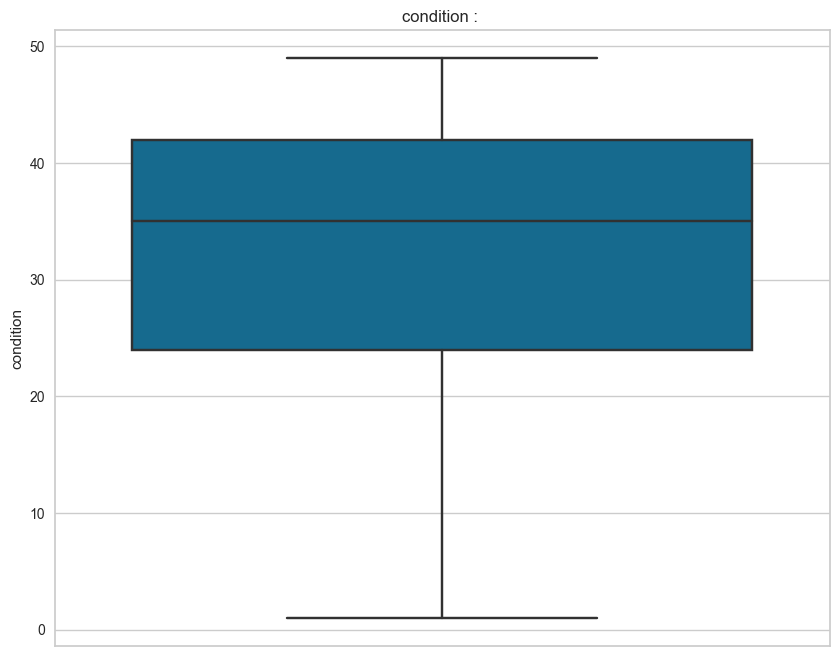

--------------------------------------------------------------------------------




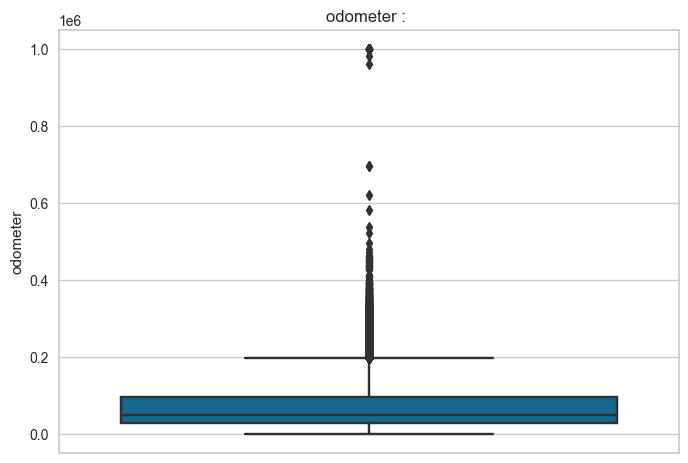

--------------------------------------------------------------------------------




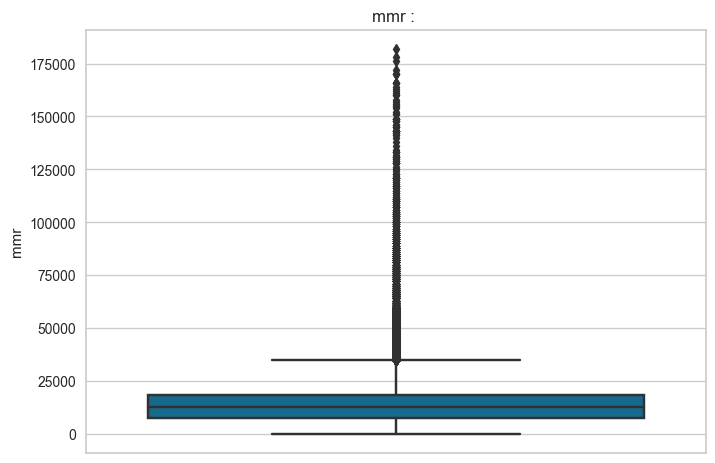

--------------------------------------------------------------------------------




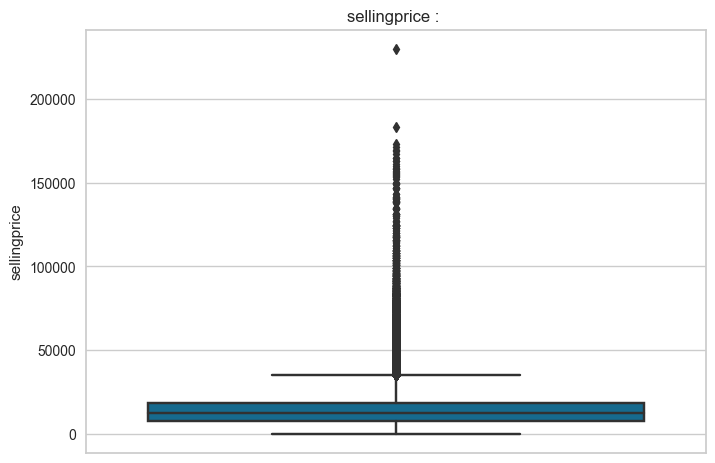

--------------------------------------------------------------------------------




In [776]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8)) 
for col in df.select_dtypes(include='float64'):
    plt.title(f'{col} : ')
    sns.boxplot(data=df, y=col)
    plt.show()  # Show each boxplot
    print('-' * 80)
    print('\n')


In [777]:
from datasist.structdata import detect_outliers
outlieres_indicies = detect_outliers(df , 0 , df.select_dtypes(include = 'float64'))
len(outlieres_indicies)

27537

In [778]:
for col in df.select_dtypes(include='float64'):
    outlieres_indicies = detect_outliers(df , 0 , [col])
    col_median = df[col].median()
    df[col].loc[outlieres_indicies] = col_median

In [779]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,522223.000000,522223.000000,522223.000000,522223.000000,522223.000000
mean,2010.257771,30.903781,62142.948905,13066.875071,12931.341471
std,3.799996,13.283630,44467.639490,7479.231924,7584.684180
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,27737.500000,7650.000000,7400.000000
50%,2012.000000,35.000000,49998.000000,12500.000000,12400.000000
75%,2013.000000,42.000000,90931.500000,17600.000000,17500.000000
max,2015.000000,49.000000,196751.000000,34900.000000,35100.000000


In [780]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

<Axes: >

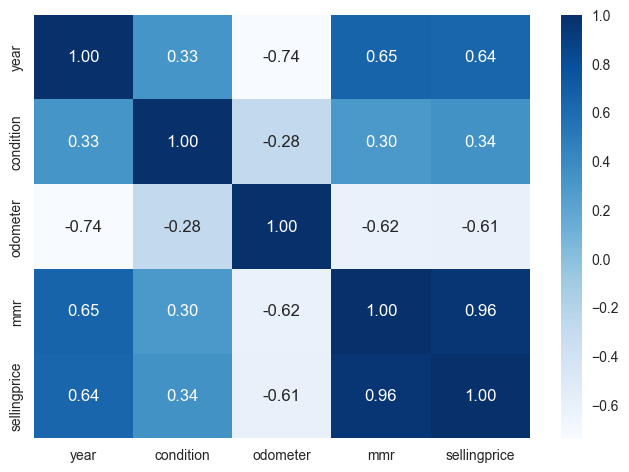

In [781]:
sns.heatmap(df.select_dtypes(exclude='object').corr() , annot= True , fmt ='.2f' , cmap='Blues')

In [782]:
df.to_csv('carsales.csv', sep=',', index=False, encoding='utf-8')

In [783]:
df['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'buick', 'cadillac', 'acura', 'lexus', 'hyundai', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'saab', 'suzuki',
       'oldsmobile', 'rolls-royce', 'isuzu', 'geo', 'tesla',
       'aston martin', 'plymouth', 'fisker', 'daewoo', 'lamborghini',
       'lotus'], dtype=object)

In [784]:
df['make'].value_counts()

make
ford             90384
chevrolet        57475
nissan           52319
toyota           38279
dodge            29419
honda            25952
hyundai          21076
bmw              18938
kia              17560
chrysler         16564
mercedes-benz    16073
infiniti         14980
jeep             14741
volkswagen       11957
lexus            11546
gmc              10130
mazda             8033
cadillac          7123
acura             5662
audi              5646
lincoln           5527
subaru            4879
buick             4796
ram               4437
pontiac           4061
mitsubishi        3912
volvo             3557
saturn            2565
mini              2551
mercury           1823
land rover        1683
scion             1617
porsche           1345
jaguar            1337
suzuki             995
fiat               819
hummer             769
saab               446
smart              385
oldsmobile         315
isuzu              174
maserati           128
bentley            114
aston 

In [785]:
df['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'tsx sport wagon',
       'promaster cargo van', 'cab plus', 'beetle convertible',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'regular-cab',
       'transit van'], dtype=object)

In [786]:
df['body'].value_counts()

body
sedan                      231307
suv                        138179
hatchback                   24791
minivan                     24461
coupe                       16644
crew cab                    15707
wagon                       15270
convertible                  9712
supercrew                    8767
g sedan                      7359
supercab                     5032
regular cab                  4572
van                          4385
extended cab                 4206
quad cab                     3869
e-series van                 1790
g coupe                      1578
double cab                   1556
crewmax cab                   540
king cab                      497
g convertible                 322
genesis coupe                 292
access cab                    286
koup                          176
club cab                      159
cts coupe                     157
mega cab                      109
elantra coupe                 101
promaster cargo van            58
beetle co

In [787]:
df['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'oh',
       'mi', 'nj', 'ga', 'va', 'sc', 'in', 'il', 'co', 'ut', 'mo', 'nv',
       'ma', 'pr', 'nc', 'ny', 'or', 'wa', 'la', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [788]:
df['state'].value_counts()

state
fl    77574
ca    68247
pa    51970
tx    41835
ga    32804
nj    26579
il    21637
oh    20457
nc    20155
tn    19826
mo    15413
mi    14904
va    11102
nv    10993
md    10304
wi     9287
mn     8735
az     7918
co     7543
wa     7055
ma     6350
ny     4804
in     4149
sc     3842
ne     3686
on     2714
pr     2635
ms     1795
la     1757
ut     1720
hi     1180
or     1121
qc     1073
ab      789
nm      144
ok       55
ns       46
al       25
Name: count, dtype: int64

In [789]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [790]:
df['color'].value_counts()

color
white        123682
black        104469
gray          78404
silver        77838
blue          47304
red           40653
gold          10159
green         10059
beige          8401
burgundy       8319
brown          6325
orange         1879
purple         1452
off-white      1384
yellow         1171
charcoal        460
turquoise       213
pink             38
lime             13
Name: count, dtype: int64

In [791]:
df['interior'].value_counts()

interior
black        238663
gray         170422
beige         57868
tan           41703
brown          8296
red            1298
silver         1053
blue           1013
off-white       469
purple          326
gold            313
white           239
green           223
burgundy        184
orange          134
yellow           19
Name: count, dtype: int64

**mmr has a strong corrleation with selling price**

In [792]:
used_data =df.drop(['vin', 'saledate','seller','trim' ,'model'], axis=1)
used_data

,year,make,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,kia,suv,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,kia,suv,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,bmw,sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,volvo,sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,bmw,sedan,automatic,ca,43.0,2641.0,gray,black,12500.0,12400.0
...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,kia,sedan,automatic,in,45.0,18255.0,silver,black,12500.0,33000.0
558833,2012,ram,crew cab,automatic,wa,5.0,54393.0,white,black,30200.0,30800.0
558834,2012,bmw,suv,automatic,ca,48.0,50561.0,black,black,29800.0,34000.0
558835,2015,nissan,sedan,automatic,ga,38.0,16658.0,white,black,15100.0,11100.0


In [793]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in used_data.select_dtypes(include='object'):
    used_data[col] = le.fit_transform(used_data[col])

In [794]:
used_data

,year,make,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,24,39,0,3,5.0,16639.0,17,1,20500.0,21500.0
1,2015,24,39,0,3,5.0,9393.0,17,0,20800.0,21500.0
2,2014,4,36,0,3,45.0,1331.0,7,1,31900.0,30000.0
3,2015,52,36,0,3,41.0,14282.0,17,1,27500.0,27750.0
4,2014,4,36,0,3,43.0,2641.0,7,1,12500.0,12400.0
...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,24,36,0,9,45.0,18255.0,15,1,12500.0,33000.0
558833,2012,41,7,0,36,5.0,54393.0,17,1,30200.0,30800.0
558834,2012,4,39,0,3,48.0,50561.0,1,1,29800.0,34000.0
558835,2015,36,36,0,6,38.0,16658.0,17,1,15100.0,11100.0


In [795]:
used_data['color'].value_counts()

color
17    123682
1     104469
7      78404
15     77838
2      47304
14     40653
6      10159
8      10059
0       8401
4       8319
3       6325
11      1879
13      1452
10      1384
18      1171
5        460
16       213
12        38
9         13
Name: count, dtype: int64

In [796]:
df['make'].value_counts()

make
ford             90384
chevrolet        57475
nissan           52319
toyota           38279
dodge            29419
honda            25952
hyundai          21076
bmw              18938
kia              17560
chrysler         16564
mercedes-benz    16073
infiniti         14980
jeep             14741
volkswagen       11957
lexus            11546
gmc              10130
mazda             8033
cadillac          7123
acura             5662
audi              5646
lincoln           5527
subaru            4879
buick             4796
ram               4437
pontiac           4061
mitsubishi        3912
volvo             3557
saturn            2565
mini              2551
mercury           1823
land rover        1683
scion             1617
porsche           1345
jaguar            1337
suzuki             995
fiat               819
hummer             769
saab               446
smart              385
oldsmobile         315
isuzu              174
maserati           128
bentley            114
aston 

In [797]:
X = used_data.drop('sellingprice' , axis = 1)
y = used_data['sellingprice']

In [798]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [799]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

X = pca.fit_transform(X)

In [800]:
pca.n_components_

9

In [801]:
df1 = pd.DataFrame(data=X)
df1.head()

,0,1,2,3,4,5,6,7,8
0,-1.290107,-0.224840,-0.752077,-0.205143,-1.662890,-0.909745,-0.286506,2.221177,0.209867
1,-1.447128,-0.145972,-0.828369,-0.310204,-1.675029,-1.097706,-0.324187,2.202183,0.170938
2,-3.015551,0.087703,0.062952,-1.240843,-0.824085,0.504490,0.973894,-0.153763,1.021217
3,-2.644395,-0.140589,-2.019361,1.326997,-0.778004,-0.185687,-0.434295,0.141737,0.976720
4,-1.612285,-0.002624,-0.178087,-1.168114,-0.839715,0.163478,1.030178,-0.440854,-1.072913


In [802]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (X, y, test_size = 0.1, random_state = 42, shuffle=True)

In [803]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , SVR
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso , LassoCV

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from catboost import CatBoostClassifier,CatBoostRegressor

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.neural_network import MLPClassifier , MLPRegressor
from sklearn.ensemble import AdaBoostClassifier , AdaBoostRegressor
from sklearn.metrics import mean_squared_error ,r2_score , explained_variance_score , mean_absolute_error ,median_absolute_error
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [51]:
models = {
    'ridge' : Ridge(),
    'ridgecv':RidgeCV(),
    'Lasso' : Lasso(),
    'Cat': CatBoostRegressor(verbose=False),
    #'LGBMC': LGBMClassifier(),
    'Random Forest': RandomForestRegressor(verbose=False),
    'XGB':xgb.XGBRegressor(verbose=0),
    "LRG": LogisticRegression(),
    #"SVC":SVR(),
    "DTC":DecisionTreeRegressor(),
    "GBC":GradientBoostingRegressor(),
    #"GNB":GaussianNB(),
    #"MNB":MultinomialNB(),
    #"BNB":BernoulliNB(),
    "KNN":KNeighborsRegressor(),
    "MLPC":MLPRegressor(),
    "ABC":AdaBoostRegressor(),
}

from sklearn.metrics import mean_absolute_error, mean_squared_error

best_model = None
best_mse = float('inf')  # Initialize with a high value for MSE

for name, model in models.items():
    print(f"Model: {name}")
    print('-' * 80)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print evaluation metrics
    print("Mean Absolute Error (MAE) =", round(mae, 2)) 
    print("Mean Squared Error (MSE) =", round(mse, 2)) 
    print("Root Mean Squared Error (RMSE) =", round(np.sqrt(mse), 2)) 
    print("R-squared =", round(model.score(x_test, y_test), 2))
    print('-' * 80)
    
    # Check if the current model outperforms the previous best model based on MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model

print(f"Best model: {best_model}, Best MSE: {best_mse}")



Model: ridge
--------------------------------------------------------------------------------
Mean Absolute Error (MAE) = 1241.67
Mean Squared Error (MSE) = 5097851.81
Root Mean Squared Error (RMSE) = 2257.84
R-squared = 0.91
--------------------------------------------------------------------------------
Model: ridgecv
--------------------------------------------------------------------------------
Mean Absolute Error (MAE) = 1241.67
Mean Squared Error (MSE) = 5097851.81
Root Mean Squared Error (RMSE) = 2257.84
R-squared = 0.91
--------------------------------------------------------------------------------
Model: Lasso
--------------------------------------------------------------------------------
Mean Absolute Error (MAE) = 1242.11
Mean Squared Error (MSE) = 5098018.59
Root Mean Squared Error (RMSE) = 2257.88
R-squared = 0.91
--------------------------------------------------------------------------------
Model: Cat
------------------------------------------------------------------

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]
final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)
stacking_reg.fit(x_train , y_train)
y_pred = stacking_reg.predict(x_test)
    
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAPE score: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred)))

R2 score: 0.91
MAPE score: 0.24


In [54]:
y_pred

array([10905.54557302, 13249.31254975, 20951.36602104, ...,
        9399.65043855,  7010.26184459, 19679.26579281])

In [55]:
y_test

424771     9750.0
183429    14600.0
493985    22300.0
45948      9500.0
445069     4700.0
           ...   
153134    17200.0
466067     3600.0
435673     6100.0
58081      6000.0
409730    26300.0
Name: sellingprice, Length: 52223, dtype: float64

In [56]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
n_estimators = [100, 200, 300]
max_depth = [3, 4, 5]
learning_rate = [0.01, 0.1, 0.2]
min_child_weight = [1, 2, 3, 4]

params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight
}

# Initialize the model
model = XGBRegressor()

# Create GridSearchCV object
grid_search_cv = GridSearchCV(estimator=model,
                              param_grid=params,
                              cv=10,
                              scoring='r2',
                              n_jobs=-1,
                              verbose=5)

# Fit the GridSearchCV object to the training data
grid_search_cv.fit(x_train, y_train)

# Get the best estimator
best_estimator = grid_search_cv.best_estimator_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [57]:
best_estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
grid_search_cv.best_score_

0.9248927401904918

In [59]:
grid_search_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 300}

In [60]:
model = CatBoostRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Learning rate set to 0.108236
0:	learn: 6912.2227599	total: 42.9ms	remaining: 42.8s
1:	learn: 6309.3910718	total: 74.8ms	remaining: 37.3s
2:	learn: 5784.3850298	total: 107ms	remaining: 35.6s
3:	learn: 5323.2324186	total: 137ms	remaining: 34.2s
4:	learn: 4915.6282247	total: 168ms	remaining: 33.3s
5:	learn: 4557.3820251	total: 204ms	remaining: 33.8s
6:	learn: 4246.1096909	total: 237ms	remaining: 33.6s
7:	learn: 3974.4867031	total: 267ms	remaining: 33.1s
8:	learn: 3738.0938934	total: 297ms	remaining: 32.7s
9:	learn: 3536.2525491	total: 326ms	remaining: 32.3s
10:	learn: 3358.8358862	total: 357ms	remaining: 32.1s
11:	learn: 3205.2191539	total: 390ms	remaining: 32.1s
12:	learn: 3073.9903352	total: 425ms	remaining: 32.3s
13:	learn: 2961.3586332	total: 458ms	remaining: 32.3s
14:	learn: 2861.8917373	total: 488ms	remaining: 32s
15:	learn: 2774.7722722	total: 518ms	remaining: 31.9s
16:	learn: 2702.4959789	total: 548ms	remaining: 31.7s
17:	learn: 2639.3291853	total: 577ms	remaining: 31.5s
18:	lear

In [61]:
y_pred

array([10881.77197925, 14236.15776978, 21491.70423662, ...,
        8485.96299926,  6350.01543521, 20600.5132016 ])

In [62]:
y_test

424771     9750.0
183429    14600.0
493985    22300.0
45948      9500.0
445069     4700.0
           ...   
153134    17200.0
466067     3600.0
435673     6100.0
58081      6000.0
409730    26300.0
Name: sellingprice, Length: 52223, dtype: float64

In [63]:
r2_score(y_test , y_pred)

0.9235639898261292

In [64]:
np.sqrt(mean_squared_error(y_test , y_pred))

2086.467544284567

In [65]:
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1 , scoring='r2')
grid.fit(x_train, y_train)
best_estimator = grid.best_estimator_

0:	learn: 6937.9874437	total: 75ms	remaining: 7.43s
1:	learn: 6354.9380173	total: 148ms	remaining: 7.26s
2:	learn: 5840.6211858	total: 225ms	remaining: 7.26s
3:	learn: 5378.2664174	total: 300ms	remaining: 7.21s
4:	learn: 4964.3765343	total: 387ms	remaining: 7.35s
5:	learn: 4600.9261634	total: 470ms	remaining: 7.36s
6:	learn: 4280.6655262	total: 548ms	remaining: 7.28s
7:	learn: 3996.7219163	total: 625ms	remaining: 7.19s
8:	learn: 3750.3794647	total: 698ms	remaining: 7.06s
9:	learn: 3530.6319587	total: 776ms	remaining: 6.98s
10:	learn: 3339.9482436	total: 849ms	remaining: 6.87s
11:	learn: 3172.3420765	total: 924ms	remaining: 6.78s
12:	learn: 3028.9596464	total: 1000ms	remaining: 6.69s
13:	learn: 2905.4934709	total: 1.08s	remaining: 6.62s
14:	learn: 2797.8843285	total: 1.15s	remaining: 6.52s
15:	learn: 2704.3643450	total: 1.23s	remaining: 6.47s
16:	learn: 2622.9742675	total: 1.31s	remaining: 6.38s
17:	learn: 2554.6339830	total: 1.38s	remaining: 6.29s
18:	learn: 2495.8564287	total: 1.47s	r

In [66]:
grid.best_score_

0.9234903372705826

In [804]:
model = CatBoostRegressor()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

Learning rate set to 0.108236
0:	learn: 6912.2227599	total: 48.3ms	remaining: 48.3s
1:	learn: 6309.3910718	total: 82.7ms	remaining: 41.3s
2:	learn: 5784.3850298	total: 116ms	remaining: 38.6s
3:	learn: 5323.2324186	total: 159ms	remaining: 39.5s
4:	learn: 4915.6282247	total: 206ms	remaining: 41s
5:	learn: 4557.3820251	total: 244ms	remaining: 40.4s
6:	learn: 4246.1096909	total: 282ms	remaining: 40s
7:	learn: 3974.4867031	total: 314ms	remaining: 38.9s
8:	learn: 3738.0938934	total: 345ms	remaining: 38s
9:	learn: 3536.2525491	total: 382ms	remaining: 37.8s
10:	learn: 3358.8358862	total: 421ms	remaining: 37.9s
11:	learn: 3205.2191539	total: 460ms	remaining: 37.9s
12:	learn: 3073.9903352	total: 493ms	remaining: 37.4s
13:	learn: 2961.3586332	total: 527ms	remaining: 37.1s
14:	learn: 2861.8917373	total: 560ms	remaining: 36.8s
15:	learn: 2774.7722722	total: 598ms	remaining: 36.8s
16:	learn: 2702.4959789	total: 635ms	remaining: 36.7s
17:	learn: 2639.3291853	total: 667ms	remaining: 36.4s
18:	learn: 2

In [805]:
y_pred

array([10881.77197925, 14236.15776978, 21491.70423662, ...,
        8485.96299926,  6350.01543521, 20600.5132016 ])

In [806]:
y_test

424771     9750.0
183429    14600.0
493985    22300.0
45948      9500.0
445069     4700.0
           ...   
153134    17200.0
466067     3600.0
435673     6100.0
58081      6000.0
409730    26300.0
Name: sellingprice, Length: 52223, dtype: float64

In [807]:
r2_score(y_test , y_pred)

0.9235639898261292

In [808]:
import joblib

In [809]:
joblib.dump(model , 'model.h5')

['model.h5']

In [810]:
joblib.dump(sc , 'scaler.h5')

['scaler.h5']

In [811]:
joblib.dump(pca , 'pca.h5')

['pca.h5']

In [813]:
predd = [2015, 0, 24, 36, 9, 45, 18255, 15, 1, 12500]
predd = sc.transform([predd])
predd = pca.transform(predd)
model.predict(predd)

array([4338.24263815])